<a href="https://colab.research.google.com/github/albertochumpitazi/Master_VIU_AlbertoChumpitazi/blob/main/01_Selecci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <center>
## <center> Universidad Internacional de Valencia (VIU) <center>
## <center> Trabajo Fin de Master (TFM) <center>


---


# <center> **Extracción de patrones de comportamiento de consumo de energía de los hogares en una red inteligente** <center>


---



**Titulación:** Máster en Big Data y Data Science

**Alumno:** Alberto Sergio Chumpitazi Llave

**Director:** Jose Carlos González, PhD.



---

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
warnings.filterwarnings('ignore')
cTemp = ['Temp']
cArtefactos0 = ['AC']
cArtefactos1 = ['Dish washer', 'Washing Machine', 'Dryer']
cArtefactos2 = ['Water heater', 'TV', 'Microwave' ]
cArtefactos3 = ['Kettle','Lighting','Refrigerator']
cArtefactos = cArtefactos0 + cArtefactos1 + cArtefactos2 + cArtefactos3
cArtefactosTemp  = cArtefactos  + cTemp

#4.1. Selección

##4.1.3. Extracción de datos y procesos mínimos

###4.1.3.1. Extraccion y Consolidacion de Informacion de Consumidores

In [76]:
dias = 1000
Horas = 24 * dias
t_end = 60 * Horas
# Definir el intervalo de tiempo como 15 minutos
intervalo_tiempo = pd.timedelta_range(start='0 min', end= str(t_end) + ' min', freq='15 min')

nombres_pestañas = []
for i in range(1, 51):
  nombres_pestañas.append('Consumer' + str(i))

ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/Dataset.xlsx'
datos_concatenados = []
for pestaña in nombres_pestañas:
  df = pd.read_excel(ruta_excel, sheet_name=pestaña)
  # Agregar una columna que indique de qué pestaña viene
  df['Consumidor'] = pestaña
  df['fecha_hora'] = pd.Timestamp('2013-08-01') + intervalo_tiempo[df.iloc[:, 0]]
  df = df.drop(df.columns[0], axis=1)
  datos_concatenados.append(df)

df_cons_consumidor = pd.concat(datos_concatenados, ignore_index=True)


In [ ]:
from google.colab import files
df_cons_consumidor.to_csv('01_Extracion_datos.csv', header=True, index=False)
files.download('01_Extracion_datos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
cTotal = ['Total Consumo']
cTemp = ['Temp']
cArtefactos0 = ['AC']
cArtefactos1 = ['Dish washer', 'Washing Machine', 'Dryer']
cArtefactos2 = ['Water heater', 'TV', 'Microwave' ]
cArtefactos3 = ['Kettle','Lighting','Refrigerator']
cArtefactos = cArtefactos1 + cArtefactos2 + cArtefactos3
cArtefactosTemp  = cArtefactos  + cTemp
ruta_df = '/content/drive/MyDrive/VIU/14MBID/Data/01_Extracion_datos.csv'
df_base = pd.read_csv(ruta_df)
df_base['fecha_hora'] = pd.to_datetime(df_base['fecha_hora'])
df_base['fecha'] = df_base['fecha_hora'].dt.date
df_base['fecha'] = pd.to_datetime(df_base['fecha'])
df_base.insert(0, 'hora', pd.to_datetime(df_base['fecha_hora']).dt.hour)
df_base = df_base.drop(columns=['Periods'])

<Axes: title={'center': 'Cantidad datos faltantes '}>

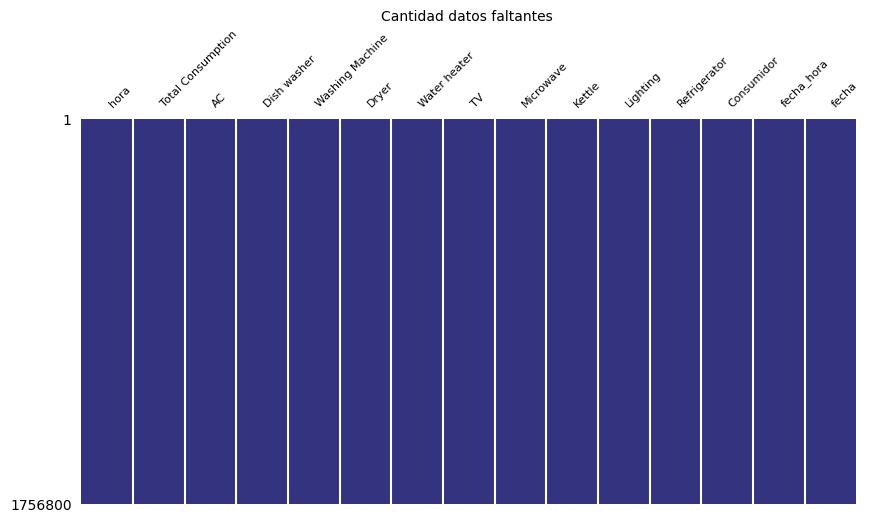

In [82]:
import missingno as msno
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.sca(axes)
axes.set_title('Cantidad datos faltantes ',fontsize=10)
msno.matrix(df_base, ax=axes, sparkline=False,fontsize=8, color =(0.2, 0.2, 0.5))

In [83]:
cagrupador = ['fecha','hora','Consumidor']
df_base_agrupada = df_base[cagrupador + cArtefactos0 + cArtefactos].groupby(cagrupador).sum()
df_base_agrupada.reset_index(inplace=True)
df_base_agrupada

,fecha,hora,Consumidor,AC,Dish washer,Washing Machine,Dryer,Water heater,TV,Microwave,Kettle,Lighting,Refrigerator
0,2013-08-01,0,Consumer1,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.14
1,2013-08-01,0,Consumer10,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.28
2,2013-08-01,0,Consumer11,0,0.0,0.0,0.0,1.178,0.000000,0.0,0.0,0.000000,0.00
3,2013-08-01,0,Consumer12,0,0.0,0.0,0.0,1.005,0.000000,0.0,0.0,0.000000,0.00
4,2013-08-01,0,Consumer13,0,0.0,0.0,0.0,2.382,0.000000,0.0,0.0,0.000000,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439195,2014-08-01,23,Consumer50,0,0.0,0.0,0.0,0.659,0.093508,0.0,0.0,0.499667,0.00
439196,2014-08-01,23,Consumer6,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.00
439197,2014-08-01,23,Consumer7,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.00
439198,2014-08-01,23,Consumer8,0,0.0,0.0,0.0,0.000,0.028975,0.0,0.0,0.000000,0.00


### 4.1.3.2. Extraccion y Consolidacion de Informacion de Prosumidores

In [84]:
dias = 1000
Horas = 24 * dias
t_end = 60 * Horas
# Definir el intervalo de tiempo como 15 minutos
intervalo_tiempo = pd.timedelta_range(start='0 min', end= str(t_end) + ' min', freq='15 min')

ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/Dataset.xlsx'
df = pd.read_excel(ruta_excel, sheet_name='Total Producers')

tamanio = len(df)
secuencia = range(tamanio)  #np.tile(np.arange(1, 97), int(np.ceil(tamanio / 96)))[:tamanio]
df.insert(0, 'periodo', secuencia)
df.insert(0,'fecha_hora',pd.Timestamp('2013-08-01') + intervalo_tiempo[df.iloc[:, 0]])
df = df.drop(df.columns[1], axis=1)

df.insert(0,'fecha',df['fecha_hora'].dt.date)
df.insert(1,'hora',pd.to_datetime(df['fecha_hora']).dt.hour)
df = df.drop('fecha_hora', axis=1)

valores = [i for i in range(15, 50)]
for i in valores:
  df = df.drop(i, axis=1)
df = df.drop(0, axis=1)

In [87]:
df_consolida = []
valores = [i for i in range(1, 15)]
for i in valores:
  df_tmp = df[['fecha','hora', i]]
  df_tmp.insert(2,'Consumidor', 'Consumer'+str(i))
  df_tmp = df_tmp.rename(columns={i: 'Producer'})
  df_consolida.append(df_tmp)
df_consolida_producers = pd.concat(df_consolida, ignore_index=True)
df_consolida_producers['fecha'] = pd.to_datetime(df_consolida_producers['fecha'])

cagrupador = ['fecha','hora','Consumidor']
df_base_producer = df_consolida_producers.groupby(cagrupador).sum()
df_base_producer.reset_index(inplace=True)
df_base_producer

,fecha,hora,Consumidor,Producer
0,2013-08-01,0,Consumer1,0.0
1,2013-08-01,0,Consumer10,0.0
2,2013-08-01,0,Consumer11,0.0
3,2013-08-01,0,Consumer12,0.0
4,2013-08-01,0,Consumer13,0.0
...,...,...,...,...
122635,2014-07-31,23,Consumer5,0.0
122636,2014-07-31,23,Consumer6,0.0
122637,2014-07-31,23,Consumer7,0.0
122638,2014-07-31,23,Consumer8,0.0


In [112]:
df_base_consumer_producer = pd.merge(df_base_agrupada, df_base_producer, on=['fecha','hora','Consumidor'], how='left')
df_base_consumer_producer['Producer'].fillna(0, inplace=True)
rel_producer = df_base_consumer_producer[df_base_consumer_producer['Producer']!=0]['Consumidor'].unique()
df_base_consumer_producer['Is_producer'] = df_base_consumer_producer['Consumidor'].isin(rel_producer)
df_base_consumer_producer


,fecha,hora,Consumidor,AC,Dish washer,Washing Machine,Dryer,Water heater,TV,Microwave,Kettle,Lighting,Refrigerator,Producer,Is_producer
0,2013-08-01,0,Consumer1,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.14,0.0,True
1,2013-08-01,0,Consumer10,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.28,0.0,True
2,2013-08-01,0,Consumer11,0,0.0,0.0,0.0,1.178,0.000000,0.0,0.0,0.000000,0.00,0.0,True
3,2013-08-01,0,Consumer12,0,0.0,0.0,0.0,1.005,0.000000,0.0,0.0,0.000000,0.00,0.0,True
4,2013-08-01,0,Consumer13,0,0.0,0.0,0.0,2.382,0.000000,0.0,0.0,0.000000,0.14,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439195,2014-08-01,23,Consumer50,0,0.0,0.0,0.0,0.659,0.093508,0.0,0.0,0.499667,0.00,0.0,False
439196,2014-08-01,23,Consumer6,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.00,0.0,True
439197,2014-08-01,23,Consumer7,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.00,0.0,True
439198,2014-08-01,23,Consumer8,0,0.0,0.0,0.0,0.000,0.028975,0.0,0.0,0.000000,0.00,0.0,True


In [113]:
ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/weather_hourly.csv'
df_temp_hora = pd.read_csv(ruta_excel, sep=",")
df_temp_hora.columns = ['datetime', 'Temp']
df_temp_hora['datetime'] = pd.to_datetime(df_temp_hora['datetime'])
df_temp_hora['datetime'] = df_temp_hora['datetime'] - pd.DateOffset(years=7)
df_temp_hora.insert(1, 'fecha', df_temp_hora['datetime'].dt.date)
df_temp_hora.insert(2, 'hora', pd.to_datetime(df_temp_hora['datetime']).dt.hour)
df_temp_hora = df_temp_hora.drop(columns=['datetime'])
df_temp_hora['fecha'] = pd.to_datetime(df_temp_hora['fecha'])
df_base_temp = pd.merge(df_base_consumer_producer, df_temp_hora, on=['fecha','hora'], how='inner')

In [114]:
df_base_temp

,fecha,hora,Consumidor,AC,Dish washer,Washing Machine,Dryer,Water heater,TV,Microwave,Kettle,Lighting,Refrigerator,Producer,Is_producer,Temp
0,2013-08-01,0,Consumer1,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.14,0.0,True,24
1,2013-08-01,0,Consumer10,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.28,0.0,True,24
2,2013-08-01,0,Consumer11,0,0.0,0.0,0.0,1.178,0.000000,0.0,0.0,0.000000,0.00,0.0,True,24
3,2013-08-01,0,Consumer12,0,0.0,0.0,0.0,1.005,0.000000,0.0,0.0,0.000000,0.00,0.0,True,24
4,2013-08-01,0,Consumer13,0,0.0,0.0,0.0,2.382,0.000000,0.0,0.0,0.000000,0.14,0.0,True,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439195,2014-08-01,23,Consumer50,0,0.0,0.0,0.0,0.659,0.093508,0.0,0.0,0.499667,0.00,0.0,False,12
439196,2014-08-01,23,Consumer6,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.00,0.0,True,12
439197,2014-08-01,23,Consumer7,0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.00,0.0,True,12
439198,2014-08-01,23,Consumer8,0,0.0,0.0,0.0,0.000,0.028975,0.0,0.0,0.000000,0.00,0.0,True,12


In [122]:
cTemp = ['Temp']
cArtefactos0 = ['AC']
cArtefactos1 = ['Dish washer', 'Washing Machine', 'Dryer']
cArtefactos2 = ['Water heater', 'TV', 'Microwave' ]
cArtefactos3 = ['Kettle','Lighting','Refrigerator']
cArtefactos = cArtefactos0 + cArtefactos1 + cArtefactos2 + cArtefactos3
cArtefactosTemp  = cArtefactos  + cTemp

In [121]:
from IPython.display import display
display(df_base_temp[cArtefactosTemp].describe().transpose())

,count,mean,std,min,25%,50%,75%,max
AC,439200.0,0.000000,0.000000,0.0,0.0,0.00,0.000,0.000000
Dish washer,439200.0,0.115774,0.539287,0.0,0.0,0.00,0.000,8.395277
Washing Machine,439200.0,0.148216,0.559036,0.0,0.0,0.00,0.000,7.271107
Dryer,439200.0,0.053109,0.375679,0.0,0.0,0.00,0.000,13.000000
Water heater,439200.0,0.198014,0.511147,0.0,0.0,0.00,0.000,4.205000
TV,439200.0,0.050385,0.123586,0.0,0.0,0.00,0.000,1.017830
Microwave,439200.0,0.075186,0.313861,0.0,0.0,0.00,0.000,3.348000
Kettle,439200.0,0.049924,0.341811,0.0,0.0,0.00,0.000,3.072000
Lighting,439200.0,0.072722,0.236256,0.0,0.0,0.00,0.000,1.759333
Refrigerator,439200.0,0.123783,0.105731,0.0,0.0,0.14,0.168,0.420000


In [126]:
cProducer = ['Producer','Is_producer']
cTemp = ['Temp']
cKey = ['fecha','hora','Consumidor']
cArtefactos1 = ['Dish washer', 'Washing Machine', 'Dryer']
cArtefactos2 = ['Water heater', 'TV', 'Microwave' ]
cArtefactos3 = ['Kettle','Lighting','Refrigerator']
cArtefactos = cArtefactos1 + cArtefactos2 + cArtefactos3

cArtefactosTemp  = cArtefactos  + cTemp
cCaractSeleccionadas = cKey + cArtefactosTemp + cProducer
df_caracteristicas_seleccionadas = df_base_temp[cCaractSeleccionadas]

In [125]:
df_caracteristicas_seleccionadas[cArtefactosTemp].describe()

,fecha,hora,Dish washer,Washing Machine,Dryer,Water heater,TV,Microwave,Kettle,Lighting,Refrigerator,Temp,Producer
count,439200,439200.000000,439200.000000,439200.000000,439200.000000,439200.000000,439200.000000,439200.000000,439200.000000,439200.000000,439200.000000,439200.000000,439200.000000
mean,2014-01-30 11:59:59.999999744,11.500000,0.115774,0.148216,0.053109,0.198014,0.050385,0.075186,0.049924,0.072722,0.123783,9.614640,0.715080
min,2013-08-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,2013-10-31 00:00:00,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,2014-01-30 12:00:00,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,9.000000,0.000000
75%,2014-05-02 00:00:00,17.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168000,15.000000,0.000000
max,2014-08-01 00:00:00,23.000000,8.395277,7.271107,13.000000,4.205000,1.017830,3.348000,3.072000,1.759333,0.420000,32.000000,39.918092
std,NaN,6.922194,0.539287,0.559036,0.375679,0.511147,0.123586,0.313861,0.341811,0.236256,0.105731,7.877476,2.915306


In [127]:
df_caracteristicas_seleccionadas

,fecha,hora,Consumidor,Dish washer,Washing Machine,Dryer,Water heater,TV,Microwave,Kettle,Lighting,Refrigerator,Temp,Producer,Is_producer
0,2013-08-01,0,Consumer1,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.14,24,0.0,True
1,2013-08-01,0,Consumer10,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.28,24,0.0,True
2,2013-08-01,0,Consumer11,0.0,0.0,0.0,1.178,0.000000,0.0,0.0,0.000000,0.00,24,0.0,True
3,2013-08-01,0,Consumer12,0.0,0.0,0.0,1.005,0.000000,0.0,0.0,0.000000,0.00,24,0.0,True
4,2013-08-01,0,Consumer13,0.0,0.0,0.0,2.382,0.000000,0.0,0.0,0.000000,0.14,24,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439195,2014-08-01,23,Consumer50,0.0,0.0,0.0,0.659,0.093508,0.0,0.0,0.499667,0.00,12,0.0,False
439196,2014-08-01,23,Consumer6,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.00,12,0.0,True
439197,2014-08-01,23,Consumer7,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.00,12,0.0,True
439198,2014-08-01,23,Consumer8,0.0,0.0,0.0,0.000,0.028975,0.0,0.0,0.000000,0.00,12,0.0,True


In [128]:
from google.colab import files
df_caracteristicas_seleccionadas.to_csv('02_Caracteristicas_seleccionadas.csv', header=True, index=False)
files.download('02_Caracteristicas_seleccionadas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>